# Рассчет направлений изгиба спиралей при переходе из неактивного состояния в активное

In [133]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [126]:
data = pd.read_csv('GPCR-TM-table-directions.csv', sep=',')
data

,index,GPCR,Family,Class,Species,pdb_active,pdb_inactive,chain_a,chain_i,TM1_active,...,TM7_inactive_top_first,TM7_inactive_bottom_last,TM7_inactive_top_last,TM1_angle,TM2_angle,TM3_angle,TM4_angle,TM5_angle,TM6_angle,TM7_angle
0,0,5-HT2C receptor,5-Hydroxytryptamine receptors,Class A (Rhodopsin),Human,6bqg,6bqh,A,A,60-81,...,"5.908139228820801, -17.511024475097656, 16.100...","3.7694239616394043, -5.636044502258301, -16.10...","3.7694239616394043, -5.636044502258301, 16.100...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,M2 receptor,Acetylcholine receptors (muscarinic),Class A (Rhodopsin),Human,4mqs,3uon,A,A,19-51,...,"8.903844833374023, -14.23011302947998, 16.1000...","3.9313883781433105, -4.963552951812744, -16.10...","3.9313883781433105, -4.963552951812744, 16.100...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,M2 receptor,Acetylcholine receptors (muscarinic),Class A (Rhodopsin),Human,4mqt,3uon,A,A,19-51,...,"8.800619125366211, -14.553483963012695, 16.100...","3.964113712310791, -5.012815475463867, -16.100...","3.964113712310791, -5.012815475463867, 16.1000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,A2A receptor,Adenosine receptors,Class A (Rhodopsin),Human,5g53,3eml,A,A,2-34,...,"11.023524284362793, -13.425384521484375, 16.10...","4.172026634216309, -6.966667652130127, -16.100...","4.172026634216309, -6.966667652130127, 16.1000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,A2A receptor,Adenosine receptors,Class A (Rhodopsin),Human,5g53,3pwh,A,A,2-34,...,"10.394371032714844, -12.885503768920898, 16.10...","3.8588309288024902, -6.706129550933838, -16.10...","3.8588309288024902, -6.706129550933838, 16.100...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,A2A receptor,Adenosine receptors,Class A (Rhodopsin),Human,5g53,3rey,A,A,2-34,...,"10.356651306152344, -13.04329776763916, 16.100...","3.7623443603515625, -6.5992326736450195, -16.1...","3.7623443603515625, -6.5992326736450195, 16.10...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,A2A receptor,Adenosine receptors,Class A (Rhodopsin),Human,5g53,3rfm,A,A,2-34,...,"10.495577812194824, -12.804301261901855, 16.10...","3.859389305114746, -6.613798141479492, -16.100...","3.859389305114746, -6.613798141479492, 16.1000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,A2A receptor,Adenosine receptors,Class A (Rhodopsin),Human,5g53,3uza,A,A,2-34,...,"10.424314498901367, -12.891732215881348, 16.10...","3.984189510345459, -6.571356296539307, -16.100...","3.984189510345459, -6.571356296539307, 16.1000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,A2A receptor,Adenosine receptors,Class A (Rhodopsin),Human,5g53,3uzc,A,A,2-34,...,"10.496953964233398, -12.764830589294434, 16.10...","3.9291348457336426, -6.593408584594727, -16.10...","3.9291348457336426, -6.593408584594727, 16.100...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,A2A receptor,Adenosine receptors,Class A (Rhodopsin),Human,5g53,3vg9,A,A,2-34,...,"10.804191589355469, -13.520809173583984, 16.10...","4.283814907073975, -7.151316165924072, -16.100...","4.283814907073975, -7.151316165924072, 16.1000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Обработка данных
*Функция обрабатывает исходную базу и выдергивает из неё координаты проекций*

In [7]:
def get_X_Y(state, tm, position):
    name = 'TM' + str(tm) + '_' + state + '_bottom_' + position
    X = []
    Y = []
    
    for point in data[name]:
        X.append(float(point.split(', ')[0]))
        Y.append(float(point.split(', ')[1]))
        
    return np.array(X), np.array(Y)

## Вычисление углов
**Углы считались по следующему алгоритму:**
1. Вычислить вектор, соединяющий проекции начала и конца спирали в неактивном состоянии.
2. Вычислить вектор, соединяющий проекции начала и конца спирали в активном состоянии.
3. Привести эти векторы в начало координат. *(Тут может быть косяк, потому что не факт, что проекции начала спиралей в активном и неактивном состоянии совпадают)*.
4. Вычислит разницу между вектором из **(2)** и вектором из **(1)**.
5. Угол между вектором **(1)** и вектором **(4)** задает направление перехода спрали из неактивного в активное состояния.

**Когда будем семплировать, алгоритм будет следующим:**
1. Вычисляем вектор, соединяющий проекции начала и конца спирали в неактивном состоянии.
2. Приводим вектор в начало координат.
3. Относительно направления, заданного вектором **(1)** строим коридор, основываясь на распределении углов.

In [127]:
def get_directions(tm):
    
    X_inactive_first, Y_inactive_first = get_X_Y('inactive', tm, 'first')
    X_inactive_last, Y_inactive_last = get_X_Y('inactive', tm, 'last')
    X_inactive_relative = X_inactive_last - X_inactive_first
    Y_inactive_relative = Y_inactive_last - Y_inactive_first
    inactive = np.array([np.array([coord[0], coord[1]]) for coord in zip(X_inactive_relative, Y_inactive_relative)])
    
    X_active_first, Y_active_first = get_X_Y('active', tm, 'first')
    X_active_last, Y_active_last = get_X_Y('active', tm, 'last')
    X_active_relative = X_active_last - X_active_first
    Y_active_relative = Y_active_last - Y_active_first
    active = np.array([np.array([coord[0], coord[1]]) for coord in zip(X_active_relative, Y_active_relative)])
    
    X_delta = X_active_relative - X_inactive_relative
    Y_delta = Y_active_relative - Y_inactive_relative
    deltas = np.array([np.array([coord[0], coord[1]]) for coord in zip(X_delta, Y_delta)])
    
    cos_angle = np.array([np.dot(t[0], t[1]) / np.linalg.norm(t[0]) / np.linalg.norm(t[1]) for t in zip(deltas, inactive)])
    cos_angle = np.arccos(cos_angle)
    dir_angle = np.array([np.sign(t[0][1] - t[0][0] * t[1][1] / t[1][0]) for t in zip (deltas, inactive)])
    angles = np.array([t[0] * t[1] for t in zip(dir_angle, cos_angle)])
    pylab.figure(1, figsize=(15, 5))
    pylab.subplot(121)
    pylab.hist(angles)
    pylab.title('direction angle in rad for TM ' + str(tm) + ' distribution')
    
    
    rot_angle = np.array([np.arccos(t[0] / np.linalg.norm(t)) * np.sign(t[1]) * (-1) for t in inactive])
    rotated_deltas = np.array([np.dot(np.array([[np.cos(t[0]), (-1) * np.sin(t[0])], [(-1) * np.sin(t[0]), (-1) * np.cos(t[0])]]), t[1]) for t in zip(rot_angle, deltas)])

    rotated_deltas_X = np.array([t[0] for t in rotated_deltas])
    rotated_deltas_Y = np.array([t[1] for t in rotated_deltas])

    pylab.subplot(122)
    pylab.scatter(rotated_deltas_X, rotated_deltas_Y)
    pylab.title('Bend direction for TM ' + str(tm) + ' in coordinats')
    
    data['TM' + str(tm) + '_angle'] = angles

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


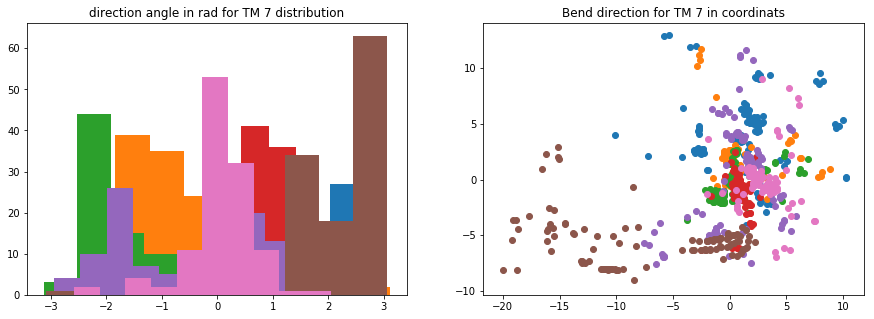

In [130]:
for i in range (1, 8):
    get_directions(i)

## Строим результаты группируя их по семьям

In [178]:
def family_plot(tm):
    families = np.unique(data['Family'])
    pylab.figure(figsize=(15, 5))
    for family in families:

        temp_data = data[data['Family'] == family]
        pylab.hist(x=temp_data['TM' + str(tm) + '_angle'], label=family)

    pylab.legend(families, loc='center left', bbox_to_anchor=(1, 0.5))
    pylab.title('angle distribution by families for TM ' + str(tm))

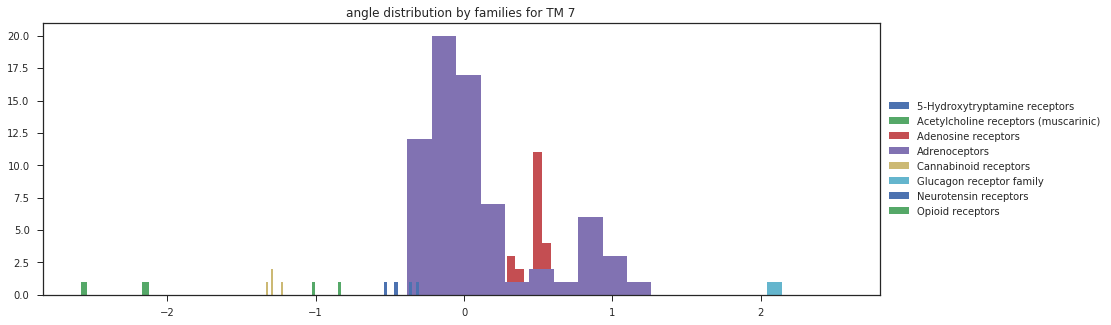

In [186]:
family_plot(7)
pylab.savefig('TM7.png', dpi=300)